In [1]:
#!/usr/bin/env python
# coding: utf-8

import os, sys
import logging
import numpy as np

import xarray as xr
import xarray.ufuncs as xu
import xrft
import pandas as pd

%matplotlib inline
from matplotlib import pyplot as plt

import cartopy.crs as ccrs
import cartopy

from cross_defPlot import *
from cross_compute import *

from dask.distributed import Client, LocalCluster
#
# Initialisation d'un cluster de 32 coeurs
cluster = LocalCluster(processes=False, n_workers=1, threads_per_worker=4, silence_logs='error', protocol = 'tcp://',
                      host = '137.129.155.67')
client = Client(cluster)
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://137.129.155.67:8787/status,
Dashboard: http://137.129.155.67:8787/status,Workers: 1
Total threads: 4,Total memory: 78.61 GiB
Status: running,Using processes: False
Comm: tcp://137.129.155.67:38613,Workers: 1
Dashboard: http://137.129.155.67:8787/status,Total threads: 4
Started: Just now,Total memory: 78.61 GiB
Comm: tcp://137.129.155.67:36231,Total threads: 4
Dashboard: http://137.129.155.67:45007/status,Memory: 78.61 GiB
Nanny: None,


In [2]:
### Parameter for the analysis
year = 2009
latitude = 10.5
longitude = 179

wave = ['TCWV_Kelvin','OLR_Kelvin']
coeff = 2

day1 = '2009-07-01'
day2 = '2009-10-01'
lat_min_box = 5.
lat_max_box = 15.
lon_min_box = -5.
lon_max_box = 5.


ds_VAR, ds_FILTER = openDATA(year, lat_min_box, lat_max_box, lon_min_box, lon_max_box)
ds_FILTER

/home/durandy/miniconda3/envs/towel/lib/python3.9/site-packages/xarray/core/indexing.py:1227: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
/home/durandy/miniconda3/envs/towel/lib/python3.9/site-packages/xarray/core/indexing.py:1227: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key

/home/durandy/miniconda3/envs/towel/lib/python3.9/site-packages/xarray/core/indexing.py:1227: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
/home/durandy/miniconda3/envs/towel/lib/python3.9/site-packages/xarray/core/indexing.py:1227: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key

,Array,Chunk
Bytes,4.46 MiB,800 B
Shape,"(2, 2920, 10, 10)","(1, 1, 10, 10)"
Count,35042 Tasks,5840 Chunks
Type,float64,numpy.ndarray
,Array,Chunk
Bytes,4.46 MiB,800 B
Shape,"(2, 2920, 10, 10)","(1, 1, 10, 10)"
Count,35042 Tasks,5840 Chunks
Type,float64,numpy.ndarray
,Array,Chunk


In [3]:
ds_FILTER['u_LF'].isel(level =1).max().values

array(0.)

In [3]:
### Compute standard deviation
ds_VAR_mean = ds_VAR.mean().compute()
ds_std_mean = ds_VAR_mean**(0.5)
ds_std = ds_VAR**(0.5)
for w in wave:
    ds_FILTER = addNegative(ds_FILTER, ds_std_mean, w)
    
ds_FILTER = ds_FILTER.sel(time = slice(day1,day2))
ds_FILTER
ds_FILTER_mean = ds_FILTER.mean(dim = ['lat','lon'])

# Vision en 1D en différents points du globe
On selectionne des données en plein ocean et sur le continent dans la bande équatoriale

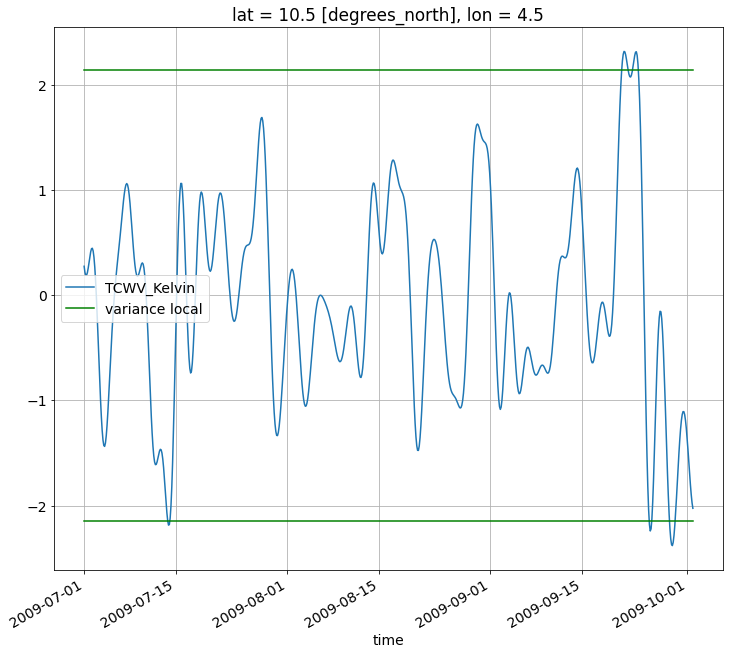

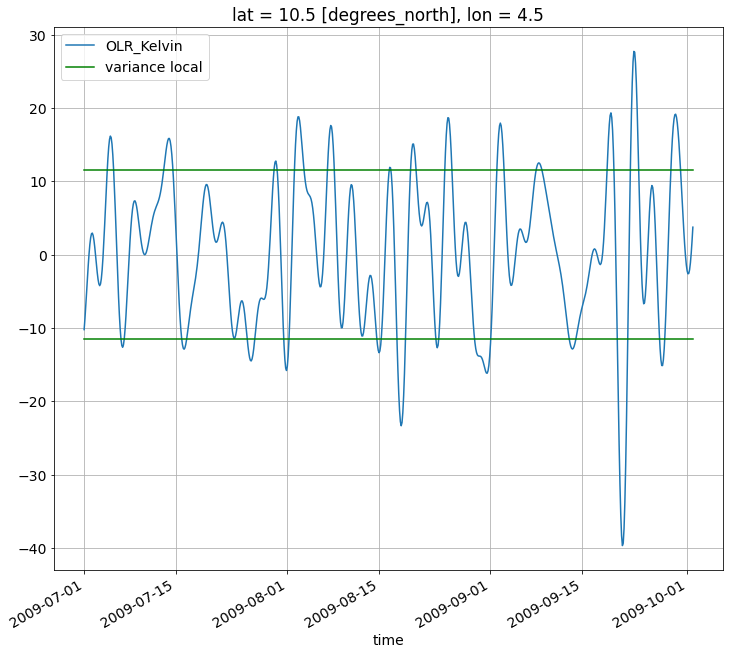

In [4]:
for w in wave:
    plotline1D(ds_FILTER, latitude, longitude, w)


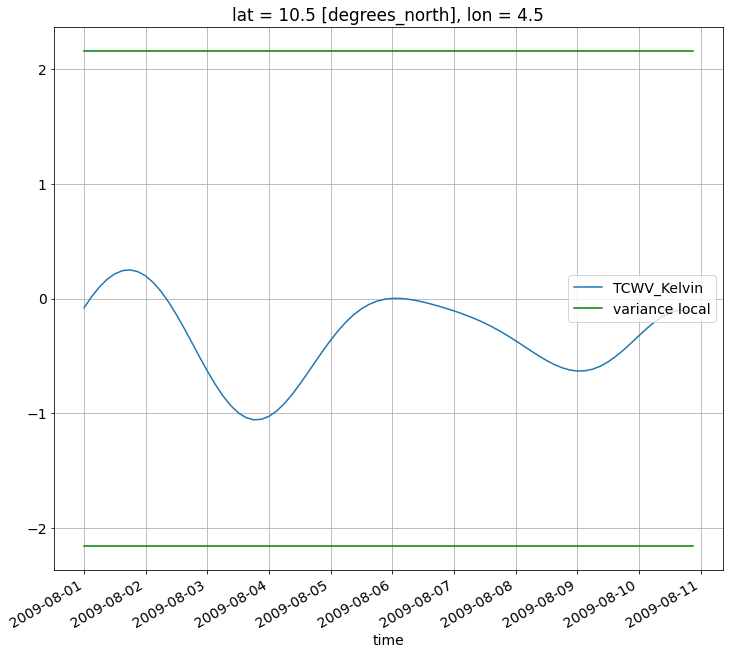

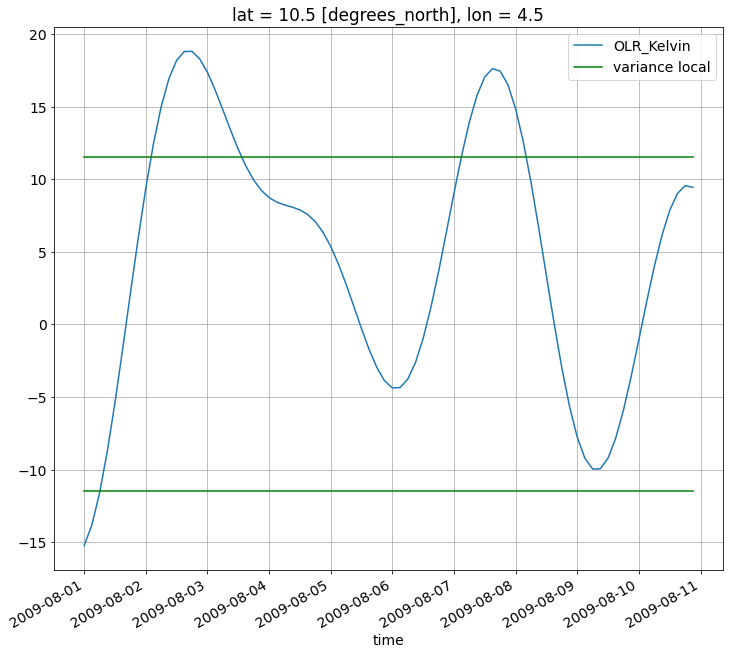

In [5]:
_ds_FILTER = ds_FILTER.sel(time = slice('2009-08-01','2009-08-10'))
for w in wave:
    plotline1D(_ds_FILTER, latitude, longitude, w)


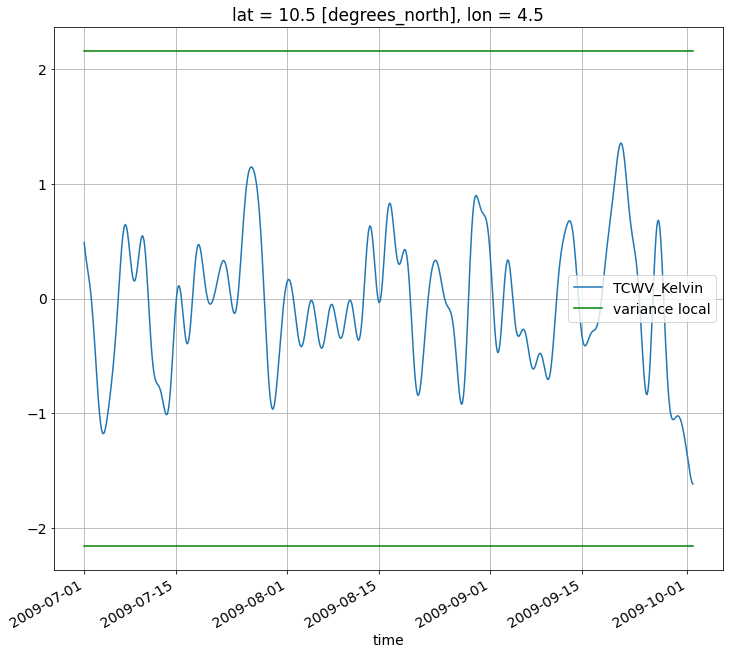

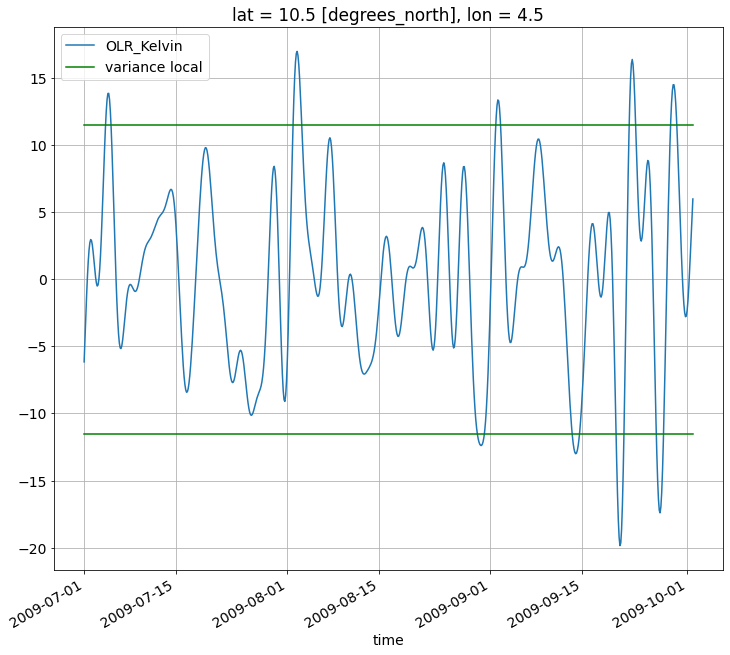

In [6]:
for w in wave:
    plotline1D_mean(ds_FILTER, latitude, longitude, w)

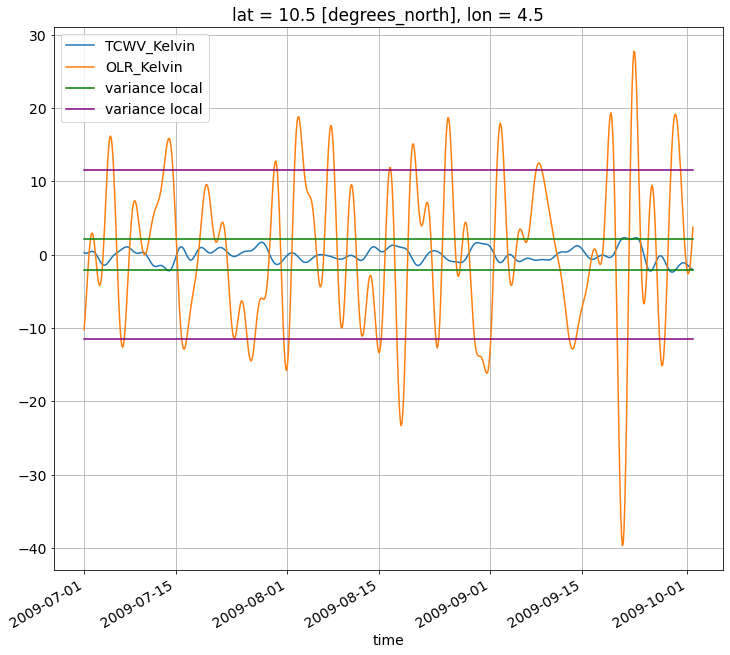

In [7]:
wave1 = wave[0]
wave2 = wave[1]
plotline1D_2V(ds_FILTER, latitude, longitude, wave1, wave2)    

# Garder uniquement les valeurs supérieur-inférieur à une valeur cible
Dans un premier temps on garde par rapport à l'anomalie filtré puis par rapport à l'anomalie

### Par rapport à l'anomalie filtré

In [8]:
wave1 = wave[0]
wave2 = wave[1]
ds_FILTER = keepData(ds_FILTER, coeff*0., wave1, wave2)
ds_FILTER

<xarray.Dataset>
Dimensions:                                (lat: 10, time: 744, lon: 10)
Coordinates:
  * lat                                    (lat) float64 5.5 6.5 ... 13.5 14.5
  * time                                   (time) datetime64[ns] 2009-07-01 ....
  * lon                                    (lon) float32 -4.5 -3.5 ... 3.5 4.5
Data variables: (12/26)
    TCWV_Kelvin                            (time, lat, lon) float64 dask.array<chunksize=(1, 10, 10), meta=np.ndarray>
    TCWV_Rossby                            (time, lat, lon) float64 dask.array<chunksize=(1, 10, 10), meta=np.ndarray>
    TCWV_MJO                               (time, lat, lon) float64 dask.array<chunksize=(1, 10, 10), meta=np.ndarray>
    TCWV_MRG                               (time, lat, lon) float64 dask.array<chunksize=(1, 10, 10), meta=np.ndarray>
    TCWV_EIG                               (time, lat, lon) float64 dask.array<chunksize=(1, 10, 10), meta=np.ndarray>
    TCWV_WIG                               (time, lat, lon) float64 dask.array<chunksize=(1, 10, 10), meta=np.ndarray>
    ...                                     ...
    STD_OLR_Kelvin                         (time, lat, lon) float64 dask.array<chunksize=(1, 10, 10), meta=np.ndarray>
    STD_OLR_Kelvin_N                       (time, lat, lon) float64 dask.array<chunksize=(1, 10, 10), meta=np.ndarray>
    TCWV_Kelvin_sum_TS                     (time, lat, lon) float64 dask.array<chunksize=(1, 10, 10), meta=np.ndarray>
    TCWV_Kelvin_below_TS                   (time, lat, lon) float64 dask.array<chunksize=(1, 10, 10), meta=np.ndarray>
    TCWV_Kelvin_above_TS                   (time, lat, lon) float64 dask.array<chunksize=(1, 10, 10), meta=np.ndarray>
    OLR_Kelvin_FILTERED_by_TCWV_Kelvin_TS  (time, lat, lon) float64 dask.array<chunksize=(1, 10, 10), meta=np.ndarray>

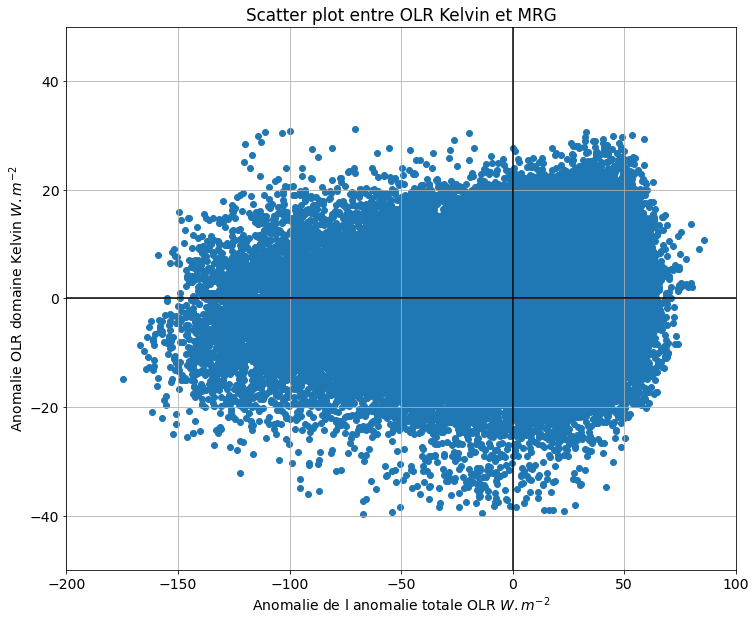

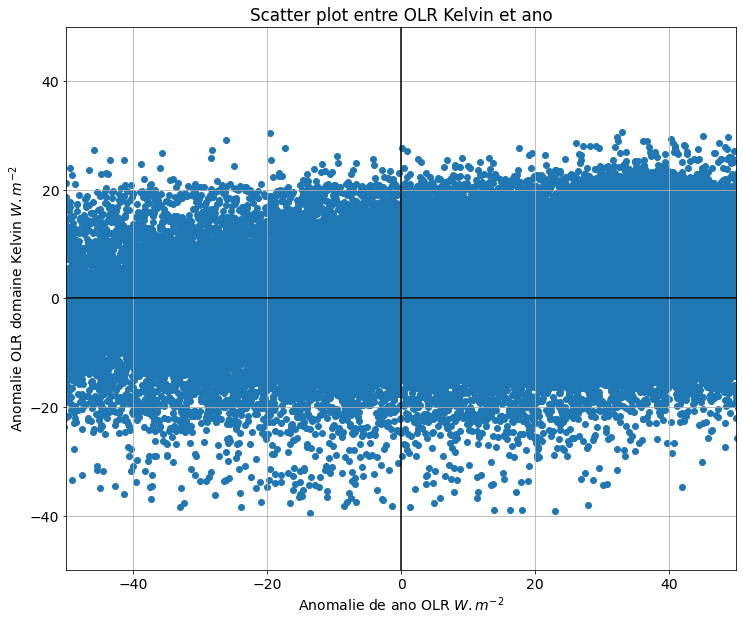

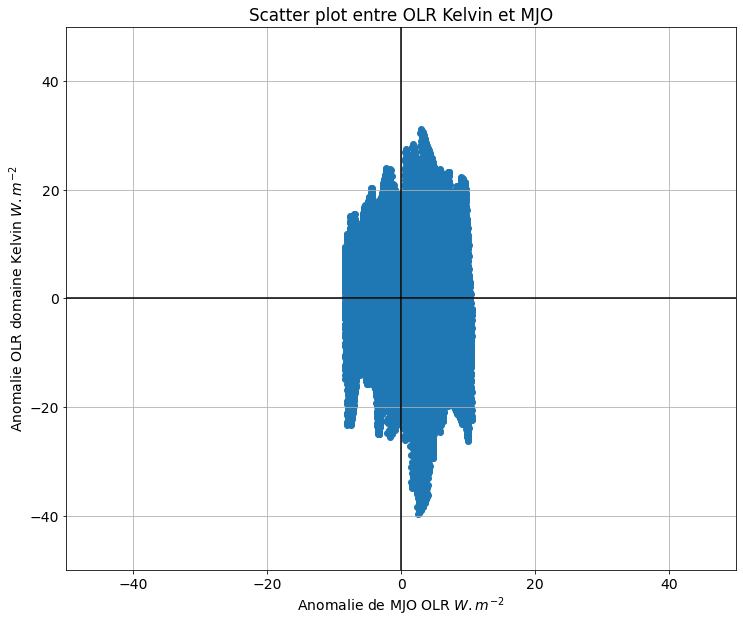

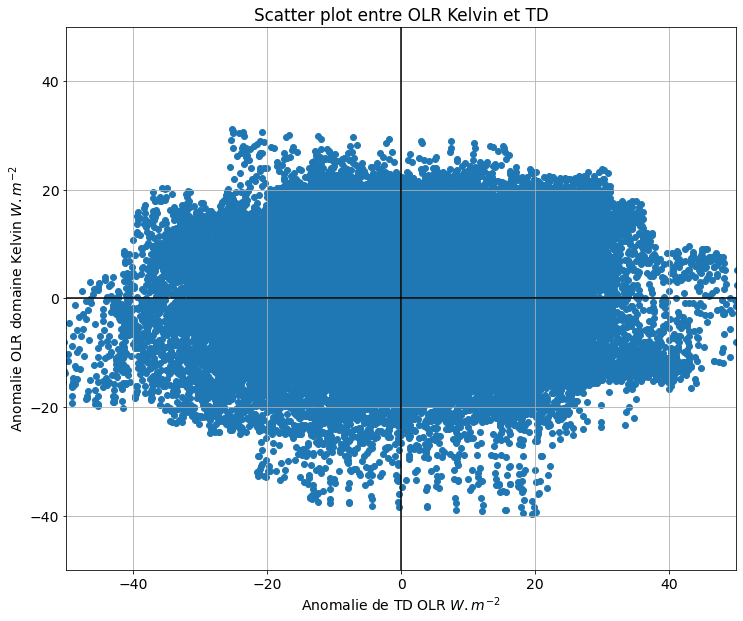

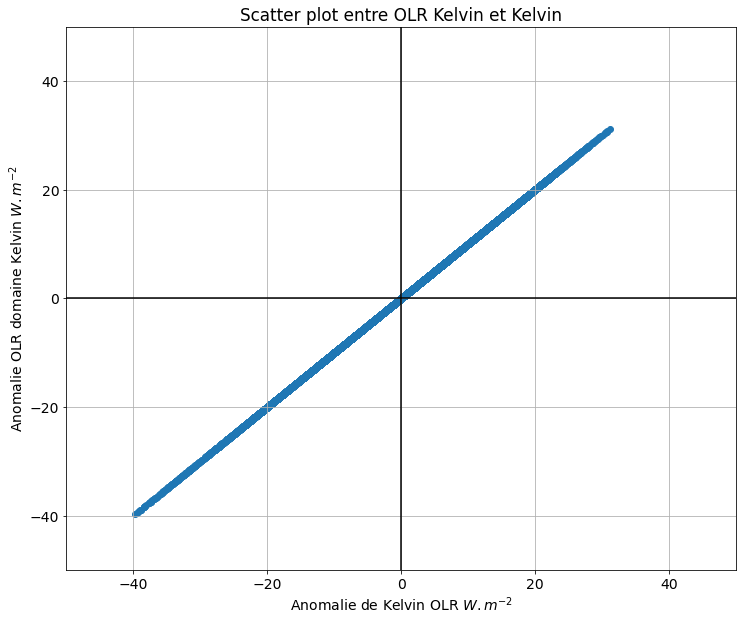

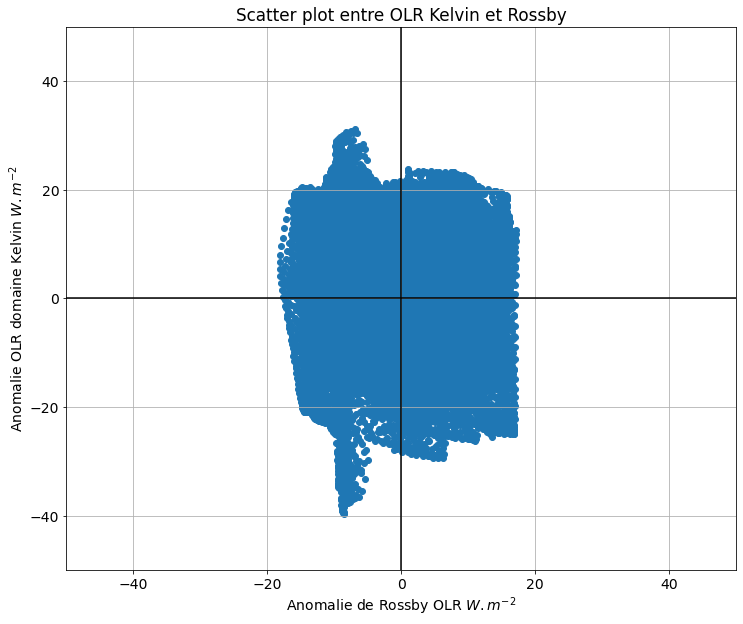

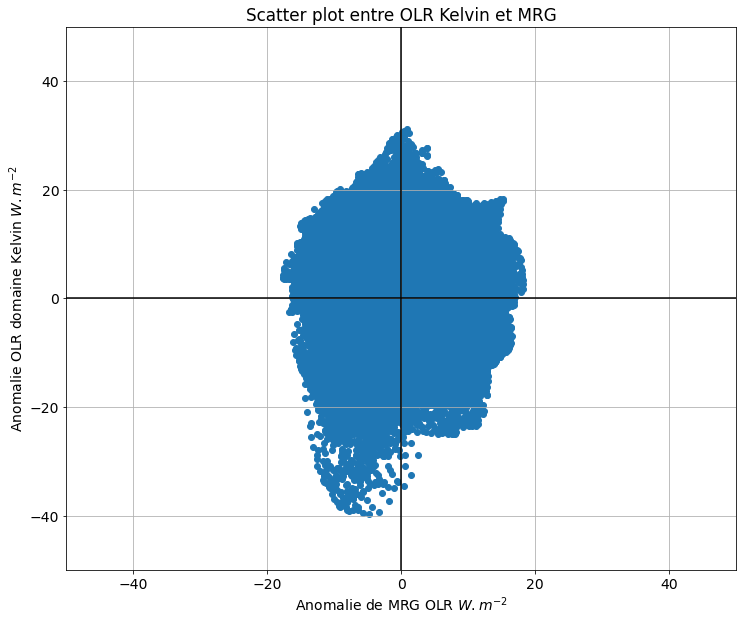

In [33]:
variable = ['MJO','TD','Kelvin','Rossby','MRG']
plt.rc("figure", figsize=(12,10))
ds_FILTER.plot.scatter(x = 'OLR_ano', y = 'OLR_Kelvin')
plt.ylabel('Anomalie OLR domaine Kelvin $W.m^{-2}$')
plt.xlabel('Anomalie de l anomalie totale OLR $W.m^{-2}$')
plt.hlines(0, -250, 100, colors = 'black')
plt.vlines(0, -55, 55, colors = 'black')
plt.title('Scatter plot entre OLR Kelvin et '+ v)
plt.xlim(-200,100)
plt.ylim(-50,50)
plt.grid()
plt.show()
    
for v in variable :
    plt.rc("figure", figsize=(12,10))
    ds_FILTER.plot.scatter(x = 'OLR_' + v, y = 'OLR_Kelvin')
    plt.ylabel('Anomalie OLR domaine Kelvin $W.m^{-2}$')
    plt.xlabel('Anomalie de ' + v + ' OLR $W.m^{-2}$')
    plt.hlines(0, -250, 100, colors = 'black')
    plt.vlines(0, -55, 55, colors = 'black')
    plt.title('Scatter plot entre OLR Kelvin et '+ v)
    plt.xlim(-50,50)
    plt.ylim(-50,50)
    plt.grid()
    plt.show()

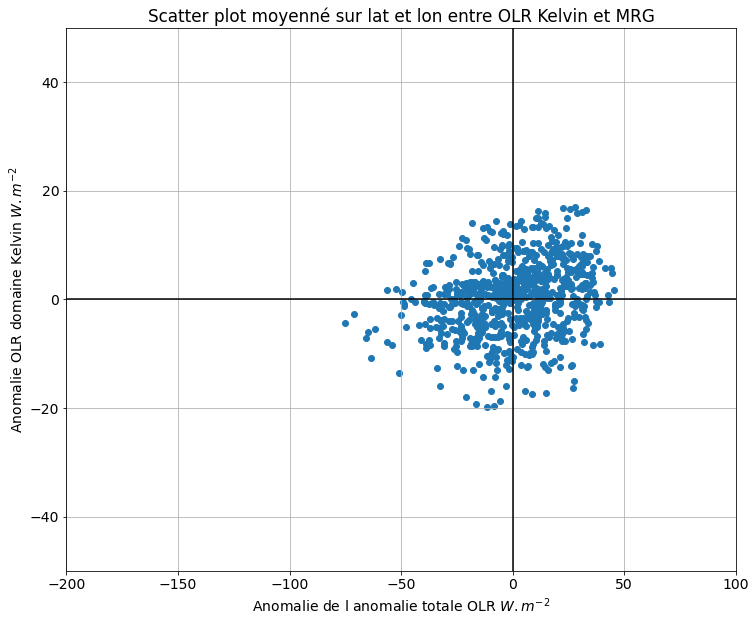

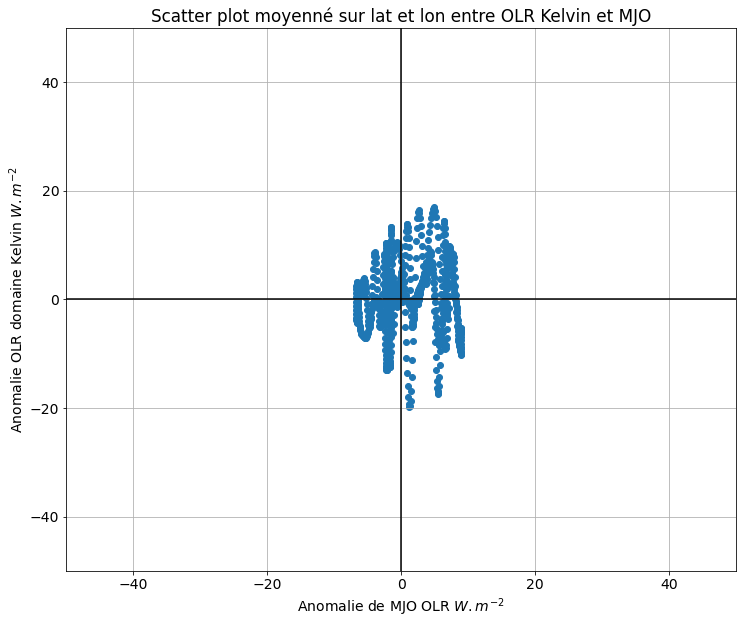

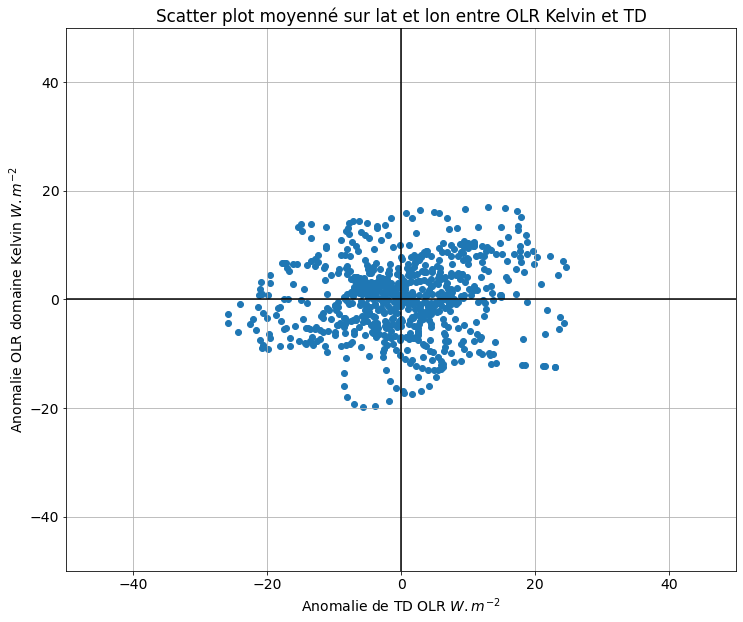

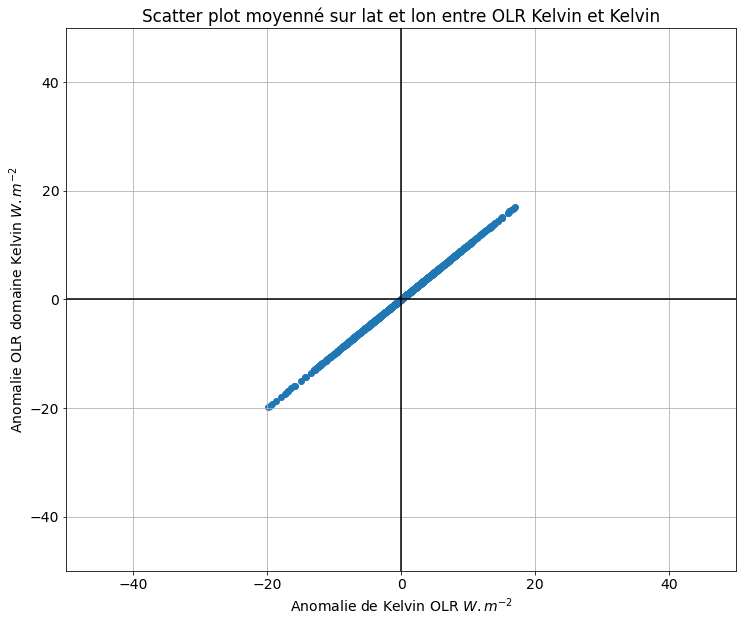

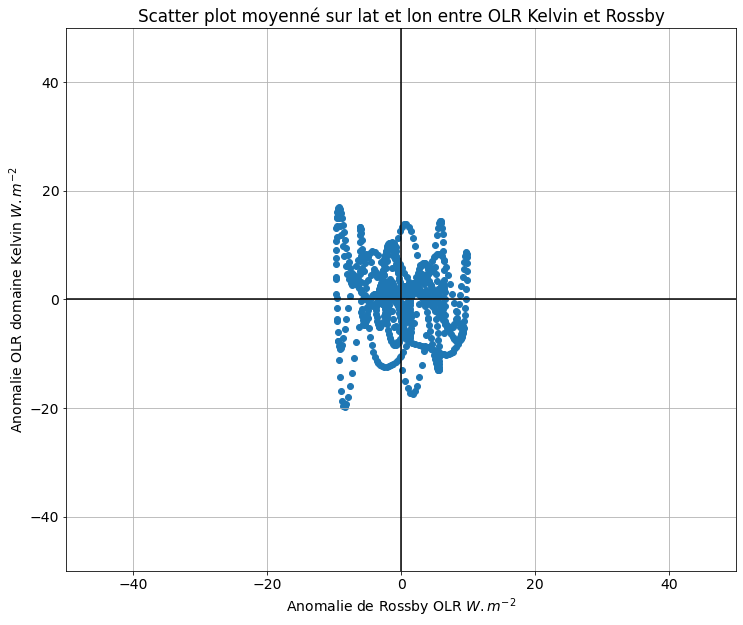

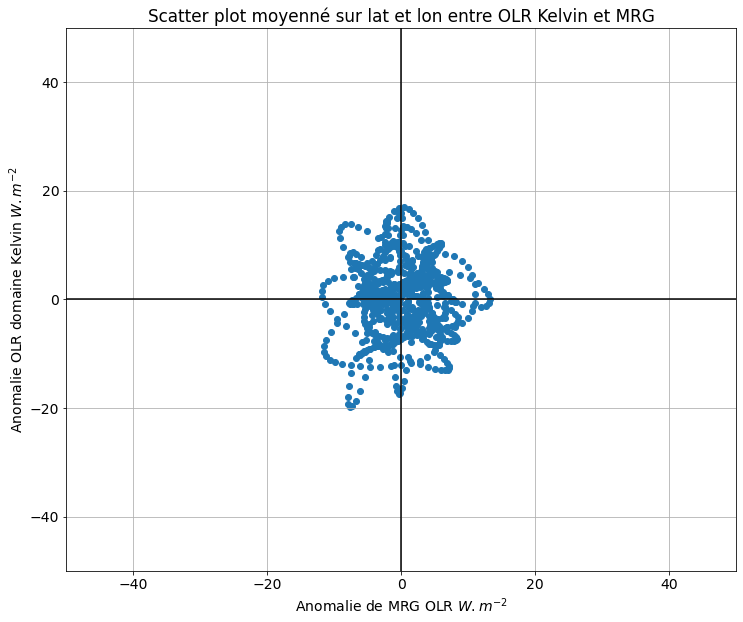

In [34]:
variable = ['MJO','TD','Kelvin','Rossby','MRG']
plt.rc("figure", figsize=(12,10))
ds_FILTER_mean.plot.scatter(x = 'OLR_ano', y = 'OLR_Kelvin')
plt.ylabel('Anomalie OLR domaine Kelvin $W.m^{-2}$')
plt.xlabel('Anomalie de l anomalie totale OLR $W.m^{-2}$')
plt.hlines(0, -250, 100, colors = 'black')
plt.vlines(0, -55, 55, colors = 'black')
plt.title('Scatter plot moyenné sur lat et lon entre OLR Kelvin et '+ v)
plt.xlim(-100,50)
plt.ylim(-35,35)
plt.grid()
plt.show()
    
for v in variable :
    plt.rc("figure", figsize=(12,10))
    ds_FILTER_mean.plot.scatter(x = 'OLR_' + v, y = 'OLR_Kelvin')
    plt.ylabel('Anomalie OLR domaine Kelvin $W.m^{-2}$')
    plt.xlabel('Anomalie de ' + v + ' OLR $W.m^{-2}$')
    plt.hlines(0, -250, 100, colors = 'black')
    plt.vlines(0, -55, 55, colors = 'black')
    plt.title('Scatter plot moyenné sur lat et lon entre OLR Kelvin et '+ v)
    plt.xlim(-50,50)
    plt.ylim(-50,50)
    plt.grid()
    plt.show()

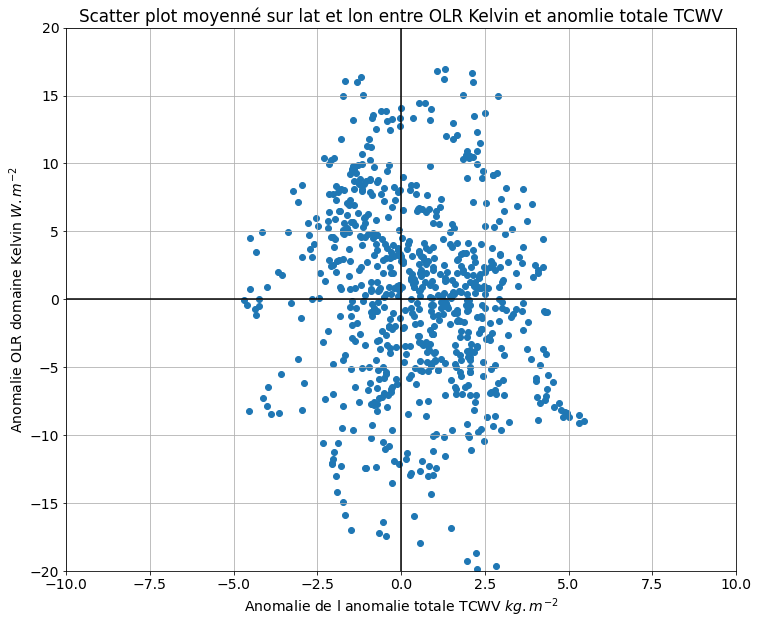

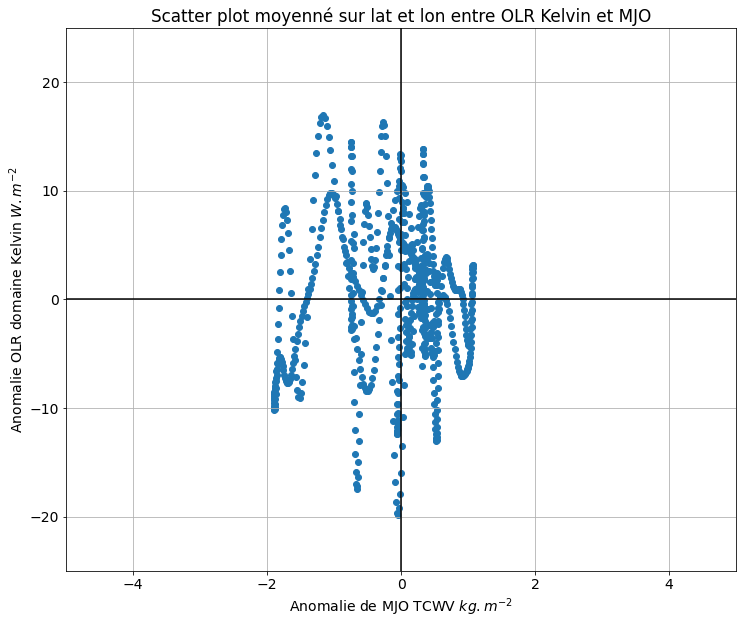

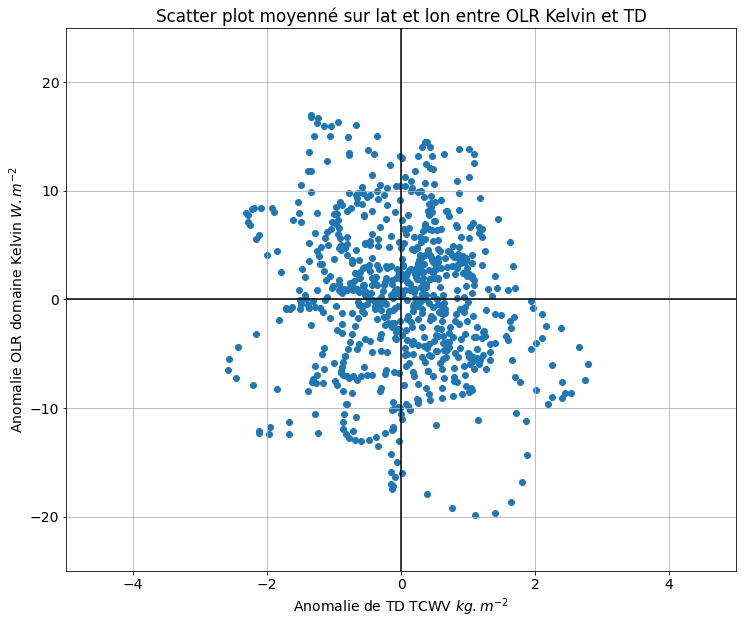

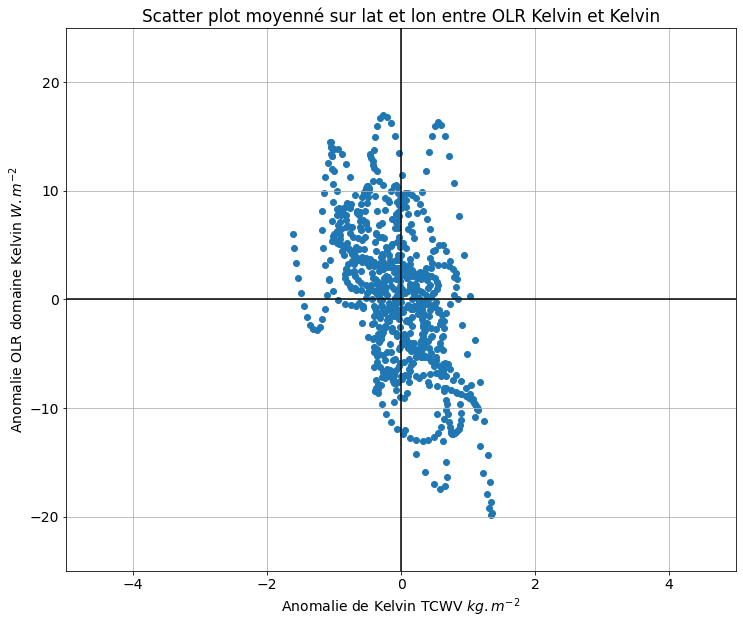

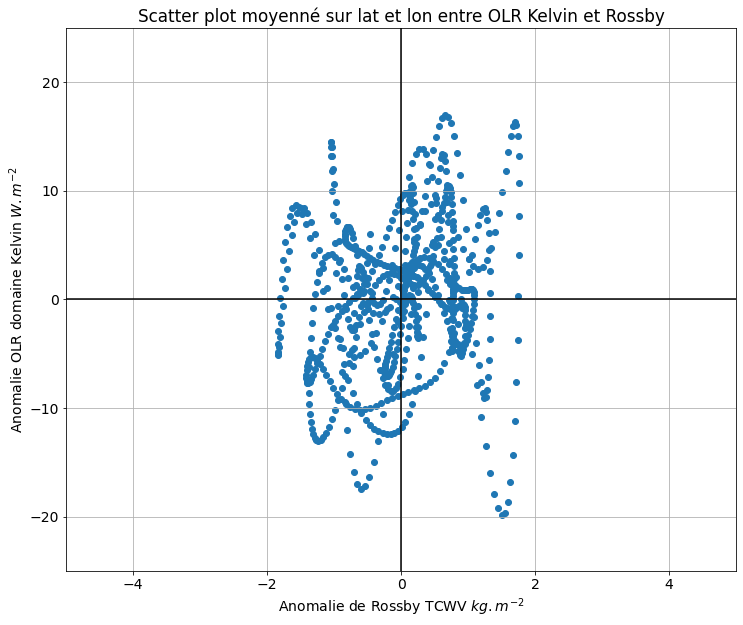

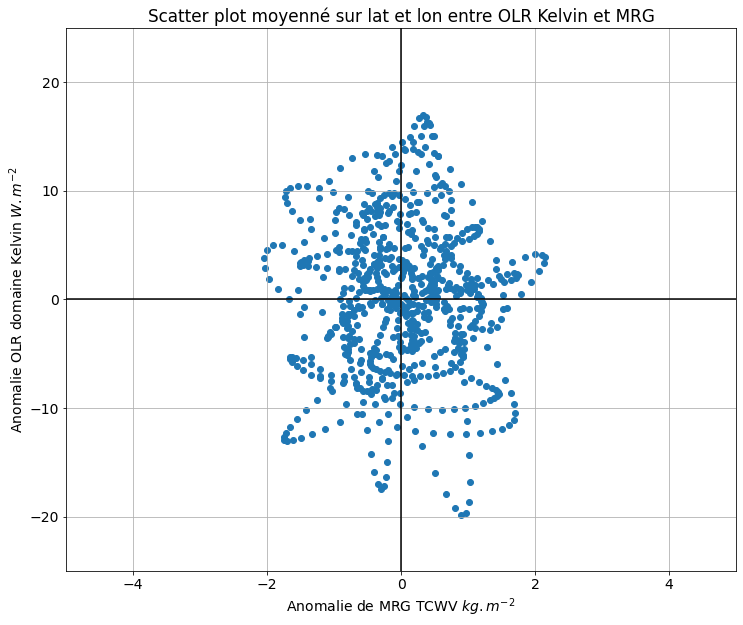

In [40]:
variable = ['MJO','TD','Kelvin','Rossby','MRG']
plt.rc("figure", figsize=(12,10))
ds_FILTER_mean.plot.scatter(x = 'tcwv_ano', y = 'OLR_Kelvin')
plt.ylabel('Anomalie OLR domaine Kelvin $W.m^{-2}$')
plt.xlabel('Anomalie de l anomalie totale TCWV $kg.m^{-2}$')
plt.hlines(0, -250, 100, colors = 'black')
plt.vlines(0, -55, 55, colors = 'black')
plt.title('Scatter plot moyenné sur lat et lon entre OLR Kelvin et anomlie totale TCWV')
plt.xlim(-10,10)
plt.ylim(-30,30)
plt.grid()
plt.show()
    
for v in variable :
    plt.rc("figure", figsize=(12,10))
    ds_FILTER_mean.plot.scatter(x = 'TCWV_' + v, y = 'OLR_Kelvin')
    plt.ylabel('Anomalie OLR domaine Kelvin $W.m^{-2}$')
    plt.xlabel('Anomalie de ' + v + ' TCWV $kg.m^{-2}$')
    plt.hlines(0, -250, 100, colors = 'black')
    plt.vlines(0, -55, 55, colors = 'black')
    plt.title('Scatter plot moyenné sur lat et lon entre OLR Kelvin et '+ v)
    plt.xlim(-5,5)
    plt.ylim(-25,25)
    plt.grid()
    plt.show()

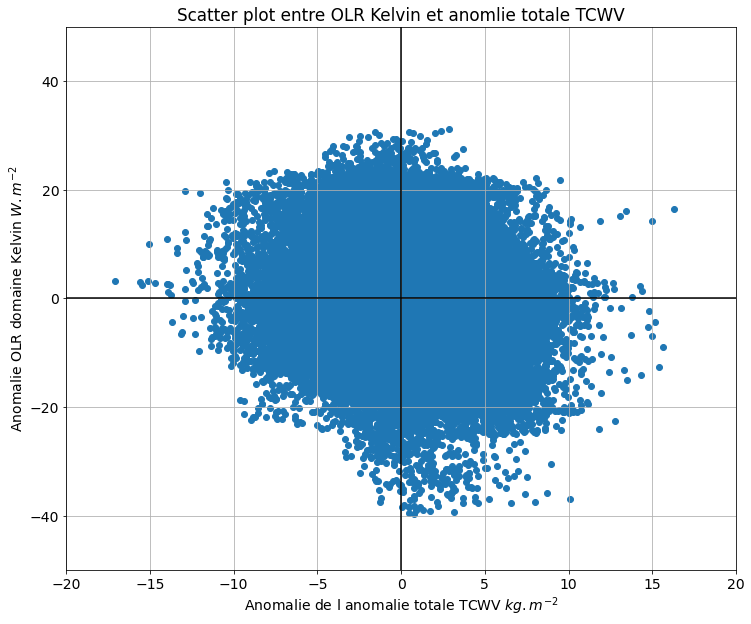

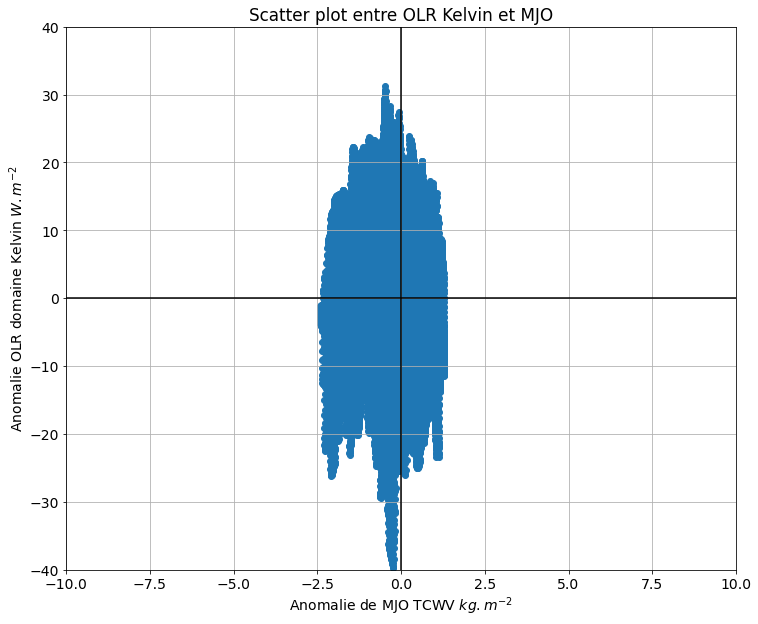

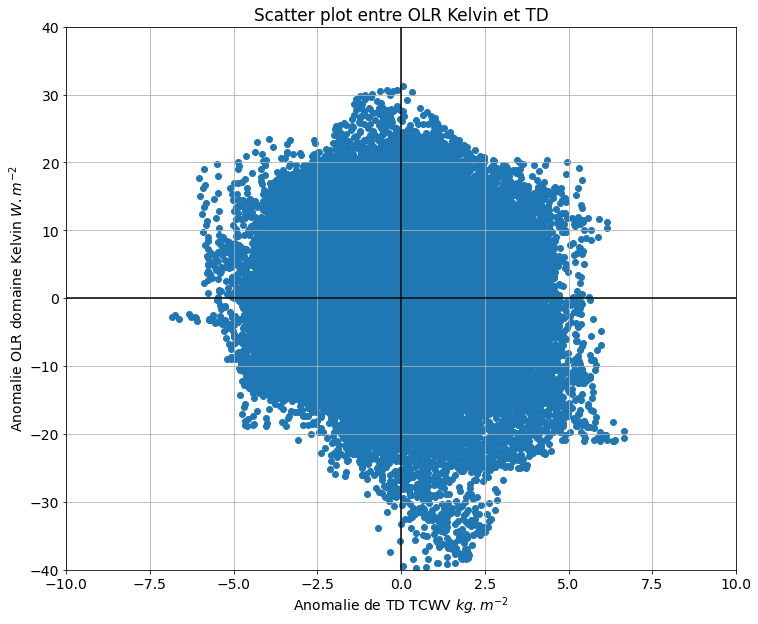

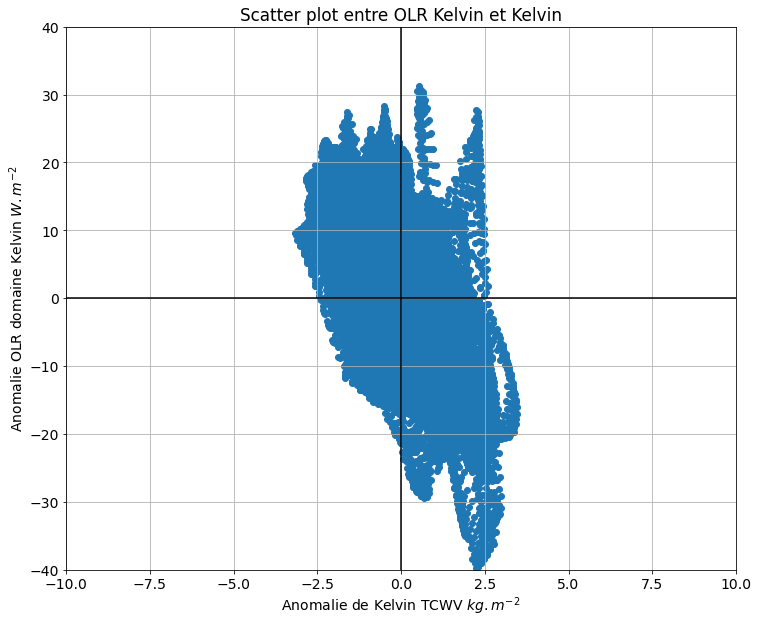

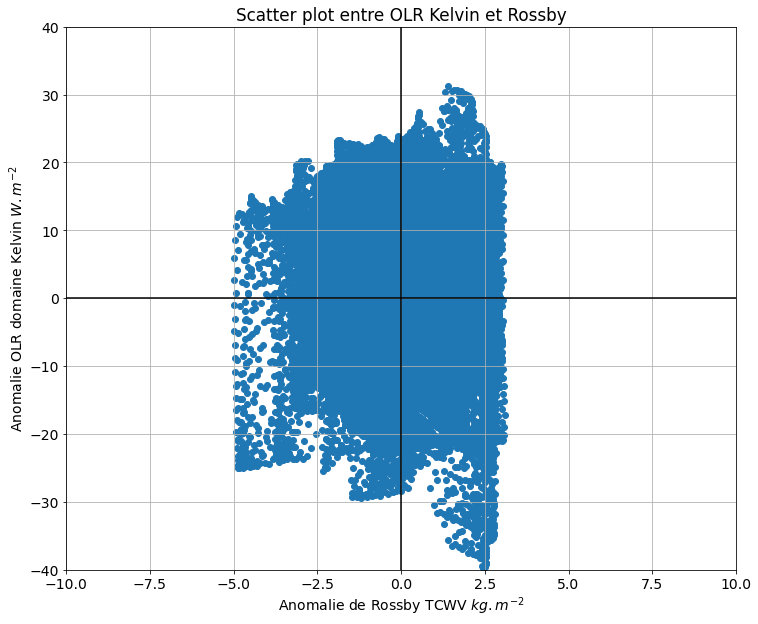

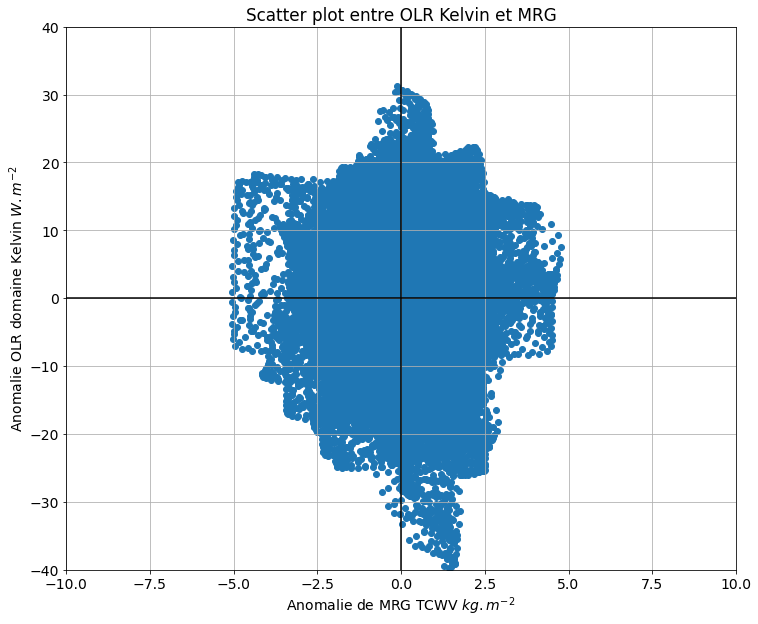

In [41]:
variable = ['MJO','TD','Kelvin','Rossby','MRG']
plt.rc("figure", figsize=(12,10))
ds_FILTER.plot.scatter(x = 'tcwv_ano', y = 'OLR_Kelvin')
plt.ylabel('Anomalie OLR domaine Kelvin $W.m^{-2}$')
plt.xlabel('Anomalie de l anomalie totale TCWV $kg.m^{-2}$')
plt.hlines(0, -250, 100, colors = 'black')
plt.vlines(0, -55, 55, colors = 'black')
plt.title('Scatter plot entre OLR Kelvin et anomlie totale TCWV')
plt.xlim(-20,20)
plt.ylim(-50,50)
plt.grid()
plt.show()
    
for v in variable :
    plt.rc("figure", figsize=(12,10))
    ds_FILTER.plot.scatter(x = 'TCWV_' + v, y = 'OLR_Kelvin')
    plt.ylabel('Anomalie OLR domaine Kelvin $W.m^{-2}$')
    plt.xlabel('Anomalie de ' + v + ' TCWV $kg.m^{-2}$')
    plt.hlines(0, -250, 100, colors = 'black')
    plt.vlines(0, -55, 55, colors = 'black')
    plt.title('Scatter plot entre OLR Kelvin et '+ v)
    plt.xlim(-10,10)
    plt.ylim(-40,40)
    plt.grid()
    plt.show()

### Par rapport à l'anomalie

In [5]:
ds_FILTER

,Array,Chunk
Bytes,1.14 MiB,800 B
Shape,"(2, 744, 10, 10)","(1, 1, 10, 10)"
Count,36530 Tasks,1488 Chunks
Type,float64,numpy.ndarray
,Array,Chunk
Bytes,1.14 MiB,800 B
Shape,"(2, 744, 10, 10)","(1, 1, 10, 10)"
Count,36530 Tasks,1488 Chunks
Type,float64,numpy.ndarray
,Array,Chunk


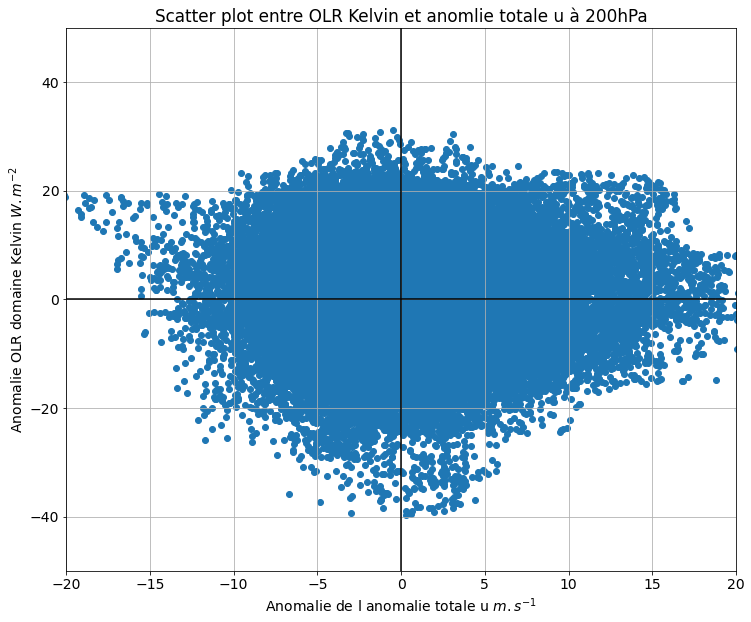

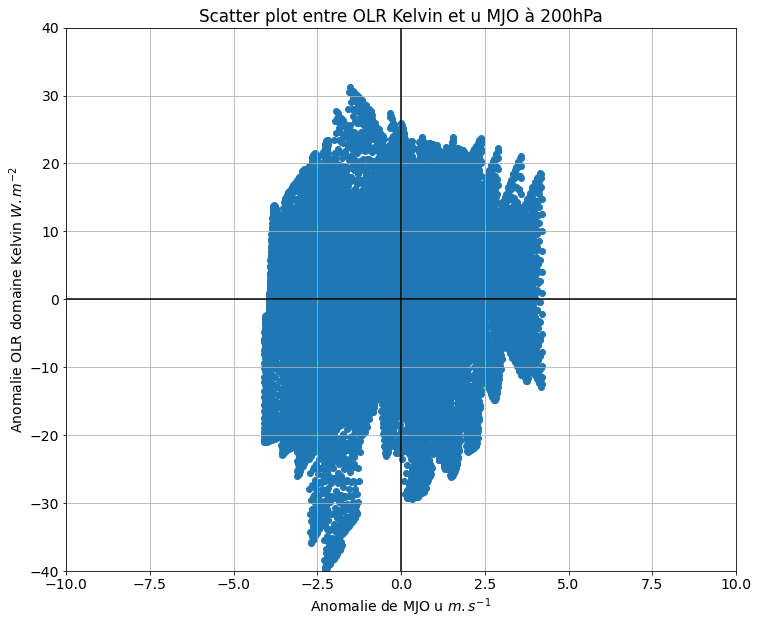

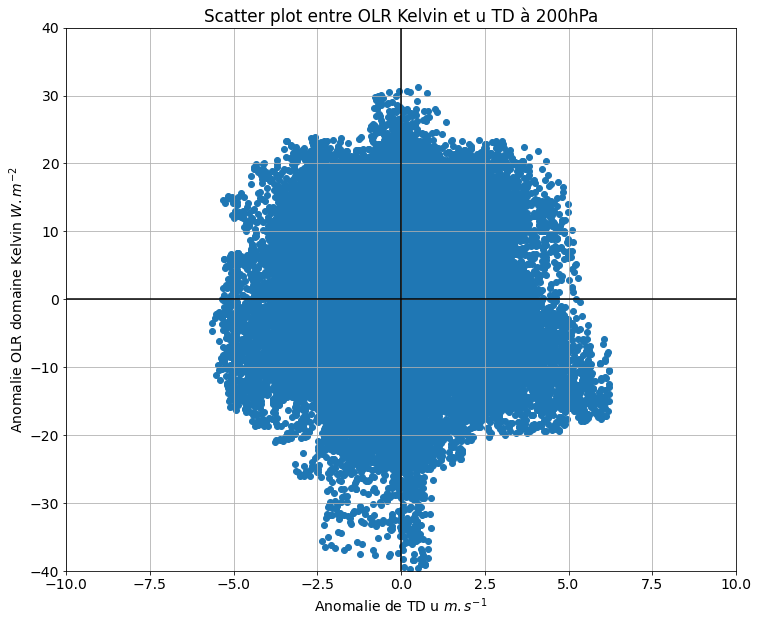

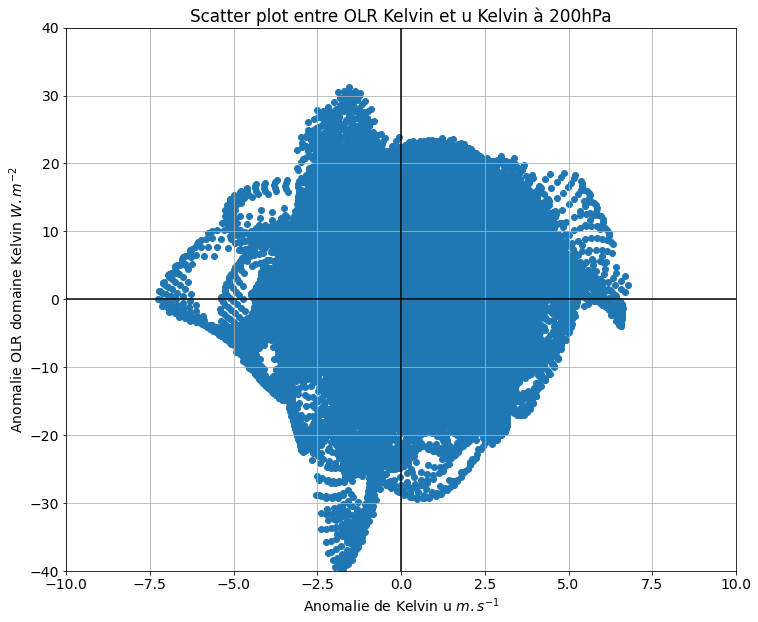

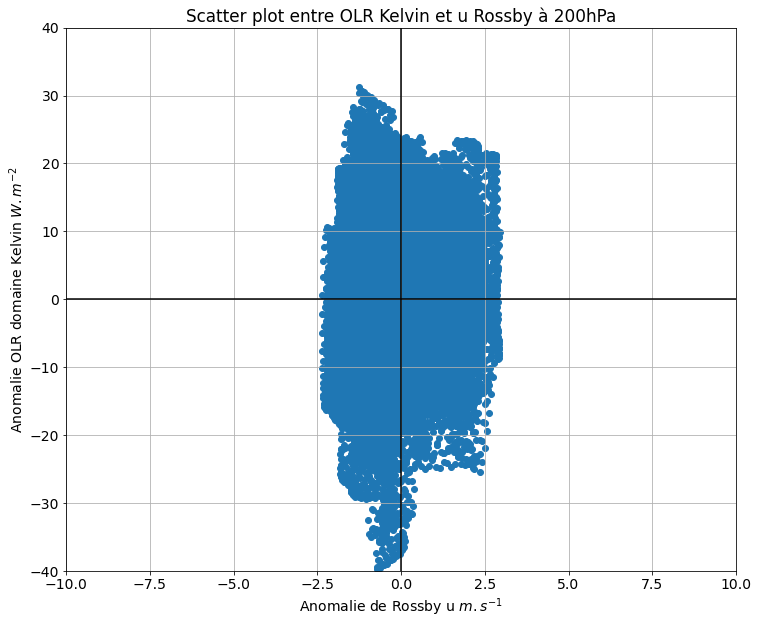

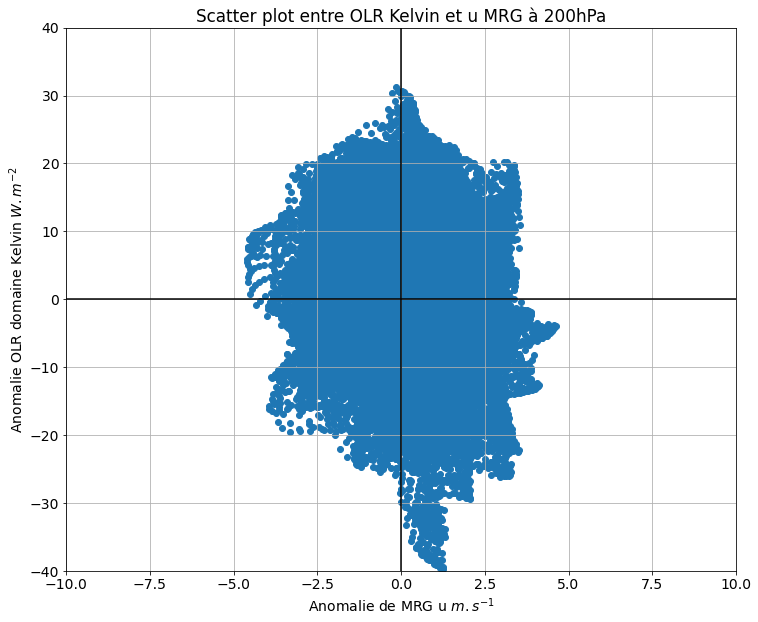

In [7]:
_ds_FILTER = ds_FILTER.sel(level = 200)
variable = ['MJO','TD','Kelvin','Rossby','MRG']
plt.rc("figure", figsize=(12,10))
_ds_FILTER.plot.scatter(x = 'u_ano', y = 'OLR_Kelvin')
plt.ylabel('Anomalie OLR domaine Kelvin $W.m^{-2}$')
plt.xlabel('Anomalie de l anomalie totale u $m.s^{-1}$')
plt.hlines(0, -250, 100, colors = 'black')
plt.vlines(0, -55, 55, colors = 'black')
plt.title('Scatter plot entre OLR Kelvin et anomlie totale u à 200hPa')
plt.xlim(-20,20)
plt.ylim(-50,50)
plt.grid()
plt.show()
    
for v in variable :
    plt.rc("figure", figsize=(12,10))
    _ds_FILTER.plot.scatter(x = 'u_' + v, y = 'OLR_Kelvin')
    plt.ylabel('Anomalie OLR domaine Kelvin $W.m^{-2}$')
    plt.xlabel('Anomalie de ' + v + ' u $m.s^{-1}$')
    plt.hlines(0, -250, 100, colors = 'black')
    plt.vlines(0, -55, 55, colors = 'black')
    plt.title('Scatter plot entre OLR Kelvin et u '+ v+ ' à 200hPa')
    plt.xlim(-10,10)
    plt.ylim(-40,40)
    plt.grid()
    plt.show()

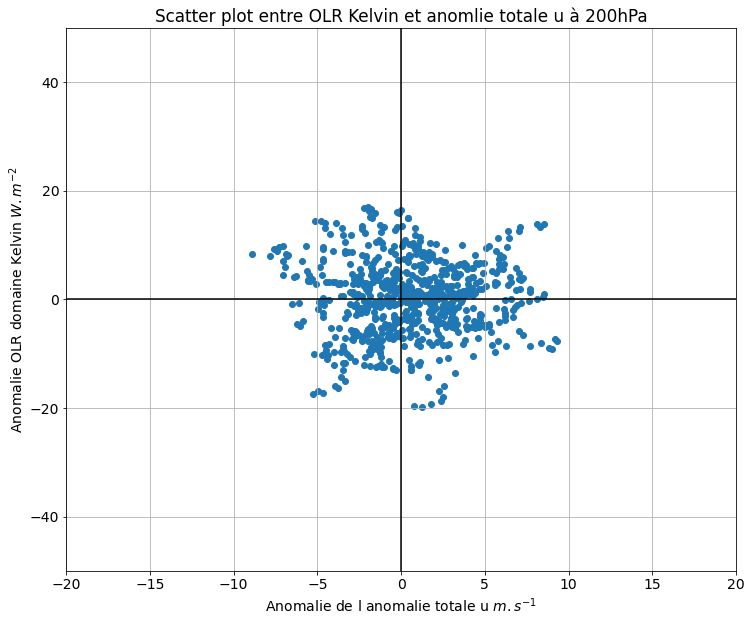

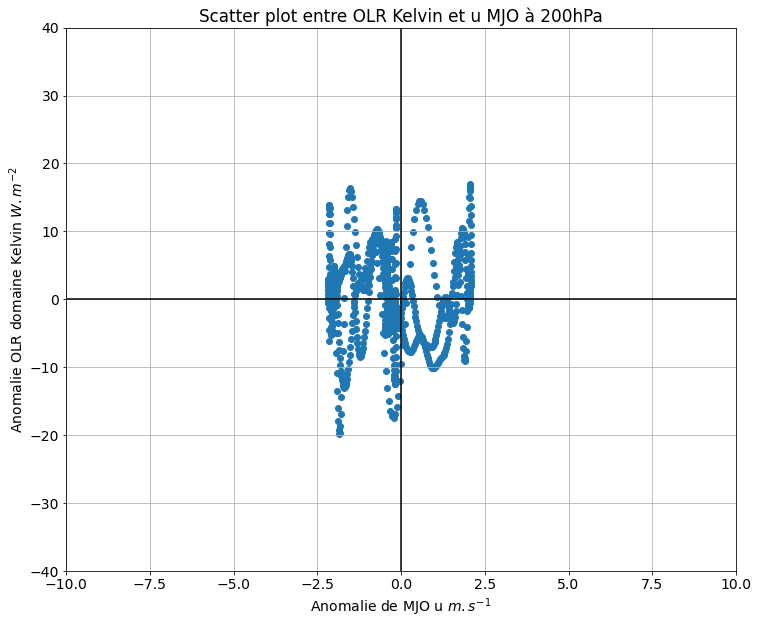

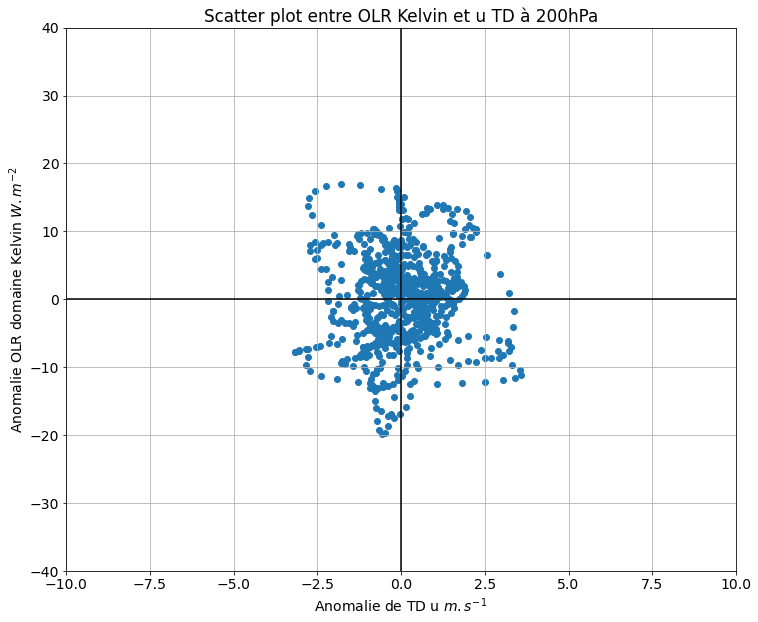

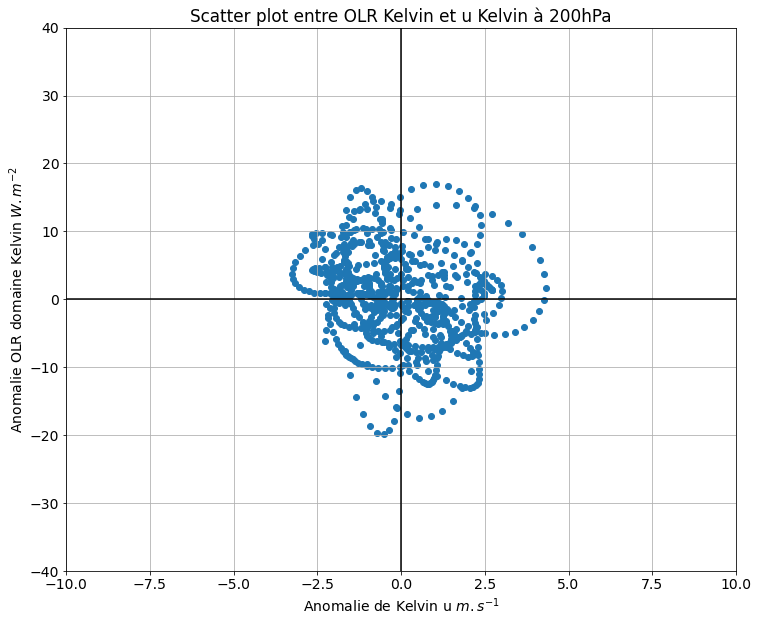

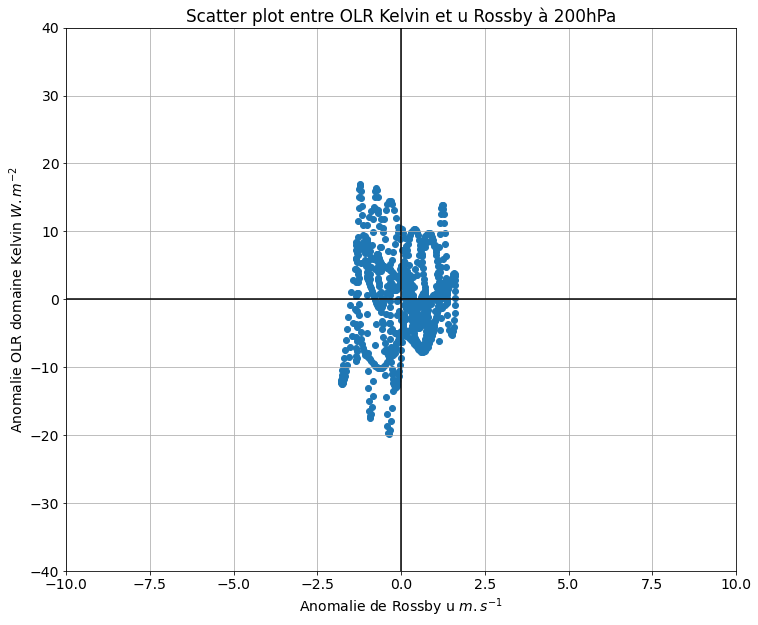

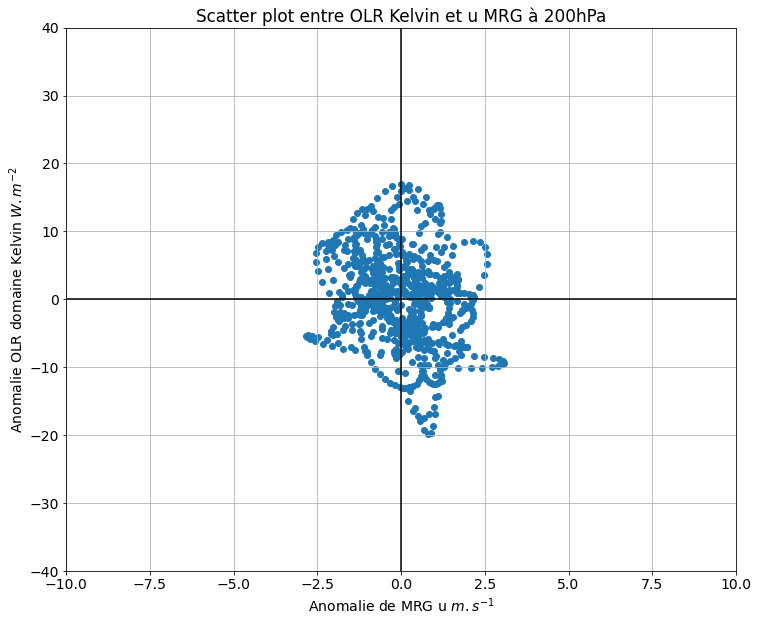

In [12]:
_ds_FILTER_mean = ds_FILTER_mean.sel(level = 200)
variable = ['MJO','TD','Kelvin','Rossby','MRG']
plt.rc("figure", figsize=(12,10))
_ds_FILTER_mean.plot.scatter(x = 'u_ano', y = 'OLR_Kelvin', hue_style = 'continuous', cmap = 'jet', add_guide = 'continuous')
plt.ylabel('Anomalie OLR domaine Kelvin $W.m^{-2}$')
plt.xlabel('Anomalie de l anomalie totale u $m.s^{-1}$')
plt.hlines(0, -250, 100, colors = 'black')
plt.vlines(0, -55, 55, colors = 'black')
plt.title('Scatter plot entre OLR Kelvin et anomlie totale u à 200hPa')
plt.xlim(-20,20)
plt.ylim(-50,50)
plt.grid()
plt.show()
    
for v in variable :
    plt.rc("figure", figsize=(12,10))
    _ds_FILTER_mean.plot.scatter(x = 'u_' + v, y = 'OLR_Kelvin')
    plt.ylabel('Anomalie OLR domaine Kelvin $W.m^{-2}$')
    plt.xlabel('Anomalie de ' + v + ' u $m.s^{-1}$')
    plt.hlines(0, -250, 100, colors = 'black')
    plt.vlines(0, -55, 55, colors = 'black')
    plt.title('Scatter plot entre OLR Kelvin et u '+ v+ ' à 200hPa')
    plt.xlim(-10,10)
    plt.ylim(-40,40)
    plt.grid()
    plt.show()

In [ ]:
_ds_FILTER = ds_FILTER.sel(level = 850)
variable = ['MJO','TD','Kelvin','Rossby','MRG']
plt.rc("figure", figsize=(12,10))
_ds_FILTER.plot.scatter(x = 'u_ano', y = 'OLR_Kelvin')
plt.ylabel('Anomalie OLR domaine Kelvin $W.m^{-2}$')
plt.xlabel('Anomalie de l anomalie totale u $m.s^{-1}$')
plt.hlines(0, -250, 100, colors = 'black')
plt.vlines(0, -55, 55, colors = 'black')
plt.title('Scatter plot entre OLR Kelvin et anomlie totale u à 200hPa')
plt.xlim(-20,20)
plt.ylim(-50,50)
plt.grid()
plt.show()
    
for v in variable :
    plt.rc("figure", figsize=(12,10))
    _ds_FILTER.plot.scatter(x = 'u_' + v, y = 'OLR_Kelvin')
    plt.ylabel('Anomalie OLR domaine Kelvin $W.m^{-2}$')
    plt.xlabel('Anomalie de ' + v + ' u $m.s^{-1}$')
    plt.hlines(0, -250, 100, colors = 'black')
    plt.vlines(0, -55, 55, colors = 'black')
    plt.title('Scatter plot entre OLR Kelvin et u '+ v+ ' à 200hPa')
    plt.xlim(-10,10)
    plt.ylim(-40,40)
    plt.grid()
    plt.show()

In [ ]:
_ds_FILTER_mean = ds_FILTER_mean.sel(level = 850)
variable = ['MJO','TD','Kelvin','Rossby','MRG']
plt.rc("figure", figsize=(12,10))
_ds_FILTER.plot.scatter(x = 'u_ano', y = 'OLR_Kelvin')
plt.ylabel('Anomalie OLR domaine Kelvin $W.m^{-2}$')
plt.xlabel('Anomalie de l anomalie totale u $m.s^{-1}$')
plt.hlines(0, -250, 100, colors = 'black')
plt.vlines(0, -55, 55, colors = 'black')
plt.title('Scatter plot entre OLR Kelvin et anomlie totale u à 200hPa')
plt.xlim(-20,20)
plt.ylim(-50,50)
plt.grid()
plt.show()
    
for v in variable :
    plt.rc("figure", figsize=(12,10))
    _ds_FILTER.plot.scatter(x = 'u_' + v, y = 'OLR_Kelvin')
    plt.ylabel('Anomalie OLR domaine Kelvin $W.m^{-2}$')
    plt.xlabel('Anomalie de ' + v + ' u $m.s^{-1}$')
    plt.hlines(0, -250, 100, colors = 'black')
    plt.vlines(0, -55, 55, colors = 'black')
    plt.title('Scatter plot entre OLR Kelvin et u '+ v+ ' à 200hPa')
    plt.xlim(-10,10)
    plt.ylim(-40,40)
    plt.grid()
    plt.show()

In [8]:
_ds_FILTER_mean = ds_FILTER_mean.sel(level = 850)


Text(0.5, 0.98, 'scatter plot entre l OLR Kelvin')

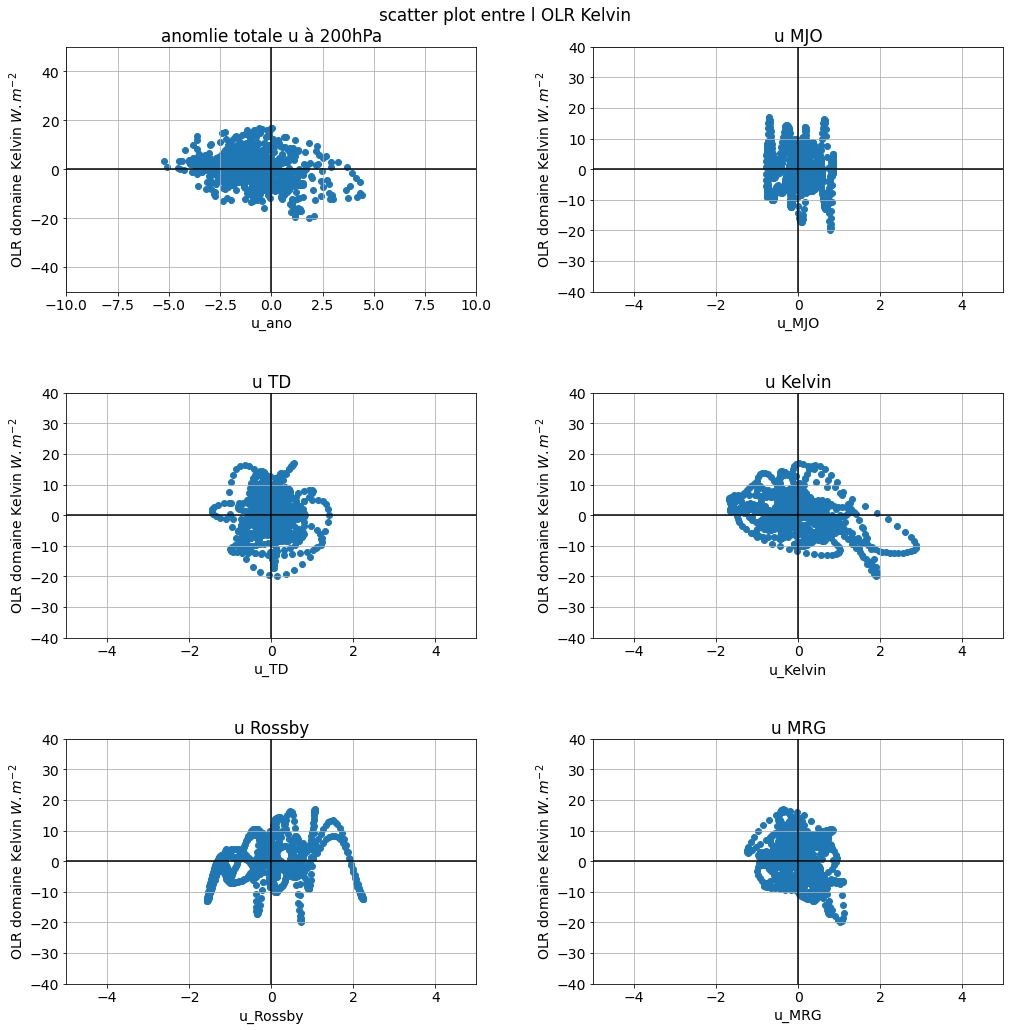

In [9]:
fig, axes = plt.subplots(ncols=2, nrows=3, figsize=(15,15))
# _ds_FILTER_mean = ds_FILTER_mean.sel(level = 850)
variable = ['MJO','TD','Kelvin','Rossby','MRG']
plt.rc("figure", figsize=(12,10))
_ds_FILTER_mean.plot.scatter(ax=axes[0, 0], x = 'u_ano', y = 'OLR_Kelvin')
axes[0,0].set_ylabel('OLR domaine Kelvin $W.m^{-2}$')
axes[0,0].set_label('anomalie totale u $m.s^{-1}$')
axes[0,0].hlines(0, -250, 100, colors = 'black')
axes[0,0].vlines(0, -55, 55, colors = 'black')
axes[0,0].set_title('anomlie totale u à 200hPa')
axes[0,0].set_xlim(-10,10)
axes[0,0].set_ylim(-50,50)
axes[0,0].grid()
# plt.show()

i = 1
j = 0
for v in variable :
    _ds_FILTER_mean.plot.scatter(ax=axes[j, i], x = 'u_' + v, y = 'OLR_Kelvin')
    axes[j,i].set_ylabel('OLR domaine Kelvin $W.m^{-2}$')
    axes[j,i].set_label('anomalie totale u $m.s^{-1}$')
    axes[j,i].hlines(0, -250, 100, colors = 'black')
    axes[j,i].vlines(0, -55, 55, colors = 'black')
    axes[j,i].set_title('u '+ v )
    axes[j,i].set_xlim(-5,5)
    axes[j,i].set_ylim(-40,40)
    axes[j,i].grid()
    i = i + 1
    if i%2 == 0:
        i = 0
        j = j + 1
        
fig.tight_layout(pad=3.0)
plt.suptitle('scatter plot entre l OLR Kelvin')

In [4]:
# _ds_FILTER_mean.to_netcdf('/cnrm/tropics/commun/DATACOMMUN/WAVE/SCRIPTS/ANALYSIS/mean_WAVE_JAS_z850.nc')
_ds_FILTER_mean = ds_FILTER_mean.sel(level = 850)


In [5]:
fig, axes = plt.subplots(ncols=2, nrows=3, figsize=(15,15))
variable = ['MJO','TD','Kelvin','Rossby','MRG']
plt.rc("figure", figsize=(12,10))
_ds_FILTER_mean.plot.scatter(ax=axes[0, 0], x = 'OLR_Kelvin', y = 'u_ano')
axes[0,0].set_ylabel('OLR domaine Kelvin $W.m^{-2}$')
axes[0,0].set_label('anomalie totale u $m.s^{-1}$')
axes[0,0].hlines(0, -250, 100, colors = 'black')
axes[0,0].vlines(0, -55, 55, colors = 'black')
axes[0,0].set_title('Scatter plot entre OLR Kelvin et anomlie totale u à 200hPa')
axes[0,0].set_xlim(-20,20)
axes[0,0].set_ylim(-50,50)
axes[0,0].grid()
# plt.show()

i = 1
j = 0
for v in variable :
    _ds_FILTER_mean.plot.scatter(ax=axes[j, i], x = 'u_' + v, y = 'u_ano')
    axes[j,i].set_ylabel('OLR domaine Kelvin $W.m^{-2}$')
    axes[j,i].set_label('anomalie totale u $m.s^{-1}$')
    axes[j,i].hlines(0, -250, 100, colors = 'black')
    axes[j,i].vlines(0, -55, 55, colors = 'black')
    axes[j,i].set_title('Scatter plot entre OLR Kelvin et anomlie totale u à 200hPa')
    axes[j,i].set_xlim(-10,10)
    axes[j,i].set_ylim(-40,40)
    axes[j,i].grid()
    i = i + 1
    if i%2 == 0:
        i = 0
        j = j + 1
        
plt.subplot_tool()
            

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7f2124125670> (for post_execute):


KeyboardInterrupt: 

In [ ]:
_ds_FILTER_mean = ds_FILTER_mean.sel(level = 200).compute()
_ds_FILTER_mean.to_netcdf('/cnrm/tropics/commun/DATACOMMUN/WAVE/SCRIPTS/ANALYSIS/mean_WAVE_JAS_z200.nc')